# Label Propagation Algorithm

**Label Propagation** is an iterative algorithm where each node adopts the label that the majority of its neighbors have, and this process continues until convergence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches

In [2]:
def build_adj(data):
    '''
    Given a data matrix that contains the edges that connect vertices, this function builds the adjacency matrix
    for an undirected graph.
    '''
    vertices = np.max(data)
    adj = np.zeros((vertices+1, vertices+1))
    for i in range(len(data)):
        adj[int(data[i,0]), int(data[i,1])] = 1
        adj[int(data[i,1]), int(data[i,0])] = 1
    return adj

In [3]:
def label_propagation(adj):
    '''
    Given an adjacency matrix, assigns labels to each vertex using the label propagation algorithm
    '''
    vertices = len(adj)
    labels = np.arange(vertices)
    iterations = 0
    while True:
        updated = False
        for i in range(vertices):
            neighbors = np.where(adj[i] == 1)[0]
            if len(neighbors) == 0:
                continue
            neighbor_labels = labels[neighbors]
            unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
            max_count_labels = unique_labels[counts == counts.max()]
            most_common_label = np.random.choice(max_count_labels)
            if labels[i] != most_common_label:
                labels[i] = most_common_label
                updated = True
        if not updated or iterations > 100:
            break
        iterations += 1
    return labels, iterations

In [4]:
def plot_label_prop(adj, labels, iteration):
    '''
    Plotting graph with colors given adj, labels and number of iterations
    '''
    graph = nx.Graph(adj)
    unique_clusters = np.unique(labels)
    cmap = plt.cm.Set3
    colors = cmap(np.linspace(0, 1, len(unique_clusters)))
    plt.figure(figsize=(7,5))
    pos = nx.spring_layout(graph, seed=42)
    node_color_list = [colors[np.where(unique_clusters == label)[0][0]] for label in labels]
    nx.draw(graph, pos, node_color=node_color_list, with_labels=False, node_size=100, edge_color='gray')
    plt.title(f'Graph Colored by Label Propagation After {iteration} Iterations')
    patches = [mpatches.Patch(color=colors[i], label=f'Cluster {label}') for i, label in enumerate(unique_clusters)]
    plt.legend(handles=patches, loc='best', title='Clusters', fontsize='small')
    plt.show()

## Example: Small Graph
Let's define a small graph and apply label propagation.

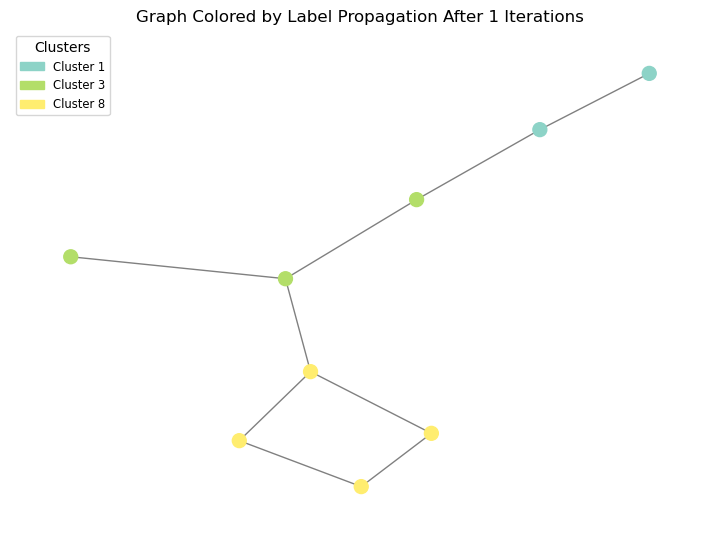

In [5]:
# Define edges in the graph (each row is an edge between two nodes)
edges = np.array([
    [0, 1], [1, 2], [2, 3], [3, 4],
    [5, 6], [6, 7], [7, 8], [8, 5],
    [3, 5]  # Connection between two communities
])

# Build adjacency matrix
adj = build_adj(edges)

# Apply label propagation
labels, iters = label_propagation(adj)

# Visualize the result
plot_label_prop(adj, labels, iters)